# 2-1. Computer Vision Basic

## Computer Vision 종류

### 1. Image Classification
- 지원모델
  - ResNet, MobileNet, DenseNet, VGG, ...
-  <img src='https://cv.gluon.ai/_static/image-classification.png' />

### 2. Object Detection
- 지원모델
  - Faster RCNN, SSD, Yolo-v3
- <img src='https://cv.gluon.ai/_static/object-detection.png' />

### 3. Semantic Segmentation
- 지원모델
  - FCN, PSP, DeepLab_v3
- <img src='https://cv.gluon.ai/_static/semantic-segmentation.png' />

### 4. Instance Segmentation
- 지원모델
  - Mask RCNN
- <img src='https://cv.gluon.ai/_static/instance-segmentation.png' />

### 5. Pose Estimation
- 지원모델
  - Simple Pose
- <img src='https://cv.gluon.ai/_static/pose-estimation.svg' width=638px   /> 
 

### 6. Video Action REcognition
- 지원모델
  - TSN, i3D, Non-local, SlowFast
- <img src='https://cv.gluon.ai/_static/action-recognition.png' width=638px />

### 7. Depth Prediction
- 지원모델
  - Monodepth2
- <img src='https://github.com/dmlc/gluon-cv/raw/master/docs/_static/depth.png'  width=638px />

### 8. Object Tracking
- 지원모델
  - SiamRPN, SMOT
- <img src='https://cv.gluon.ai/_static/smot_demo.gif'  width=638px />


--------------------

## Neural Network

- 각각의 화살표마다 가중치값이 적용되며, 학습 시 해당 값에 대하여 값을 설정하면서 학습한다
<img src='https://sites.google.com/site/ticketlabdocumentation/_/rsrc/1524654219496/computer-vision/neural_net2.jpeg' width=100%>

## image에서 특징을 추출 하기

<img src='https://static.news.zumst.com/images/43/2017/08/10/4ef3dd3f75444118b9cfce45fd2a52f7.jpg' >

### image download

In [1]:
!curl https://static.news.zumst.com/images/43/2017/08/10/4ef3dd3f75444118b9cfce45fd2a52f7.jpg > son.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 28540  100 28540    0     0  28540      0  0:00:01 --:--:--  0:00:01  442k


### image load

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model

# maplotlib.pyplot 모듈은 pyplot 모듈의 각각의 함수를 사용해서 그래프 생성
from matplotlib import pyplot
from numpy import expand_dims

In [17]:
# 앞에서 다운받은 이미지 로드
img_org = load_img('./son.png')

In [18]:
# img_to_array 함수를 사용해서 이미지를 array로 변환
# Python OpenCV 라이브러리를 사용해도 가능
# array_to_img()는 array를 이미지로 변환
img_org = img_to_array(img_org)

# 차원 확인 (해상도)
img_org.shape

# (가로, 세로, RGB값)
# 아마 이미지를 배열로 변환하면서 픽셀 이미지로 변경하는 작업인 듯 하다.

(600, 600, 3)

In [19]:
# 이미지의 크기를 250x250으로 설정하여 로드
img = load_img('./son.png', target_size=(250, 250))

In [20]:
# 해당 이미지의 특징
250*250*3

187500

특징을 유지한채로 128 개의 array에 담아내기!

In [21]:
# PIL = Python Image Library
type(img)

PIL.Image.Image

### ndarray 형태로 변환

In [11]:
# 딥러닝에서 이미지는 주로 ndarray로 다룬다
img = img_to_array(img) 

In [12]:
type(img)

numpy.ndarray

In [13]:
img.shape

(250, 250, 3)

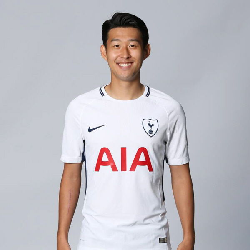

In [29]:
img

- normallize(0~1)

In [28]:
# 0부터 1까지의 데이터를 ......
img /= 255.

TypeError: unsupported operand type(s) for /=: 'Image' and 'float'

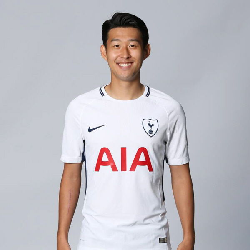

In [25]:
img

### 변환된 데이터를 pyplot으로 확인하기

In [30]:
import matplotlib.pyplot as plt

In [35]:
plt.rcParams['figure.figsize'] = (10, 10) # set figure size

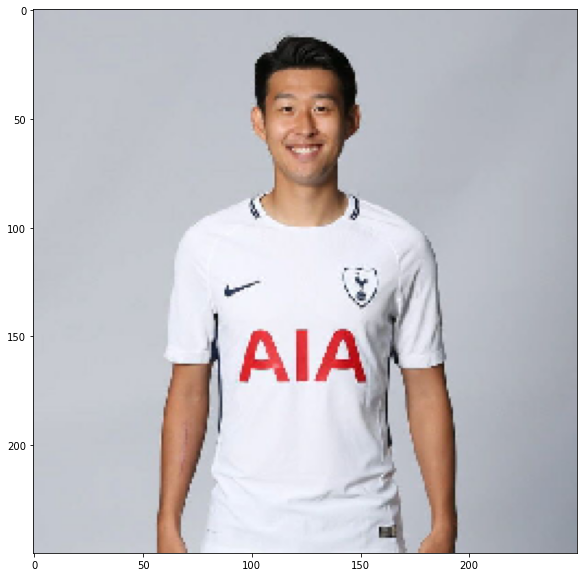

In [36]:
# 변환한 데이터 출력
plt.imshow(img)
plt.show()

### convolution

In [33]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models

- input_shape 과 마지막 layer의 shape이 중요합니다

<img src='https://cezannec.github.io/assets/cnn_intro/CNN_ex.png' width=100% />

In [ ]:
model = models.Sequential() 
model.add(layers.InputLayer(input_shape=(250,250,3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

In [ ]:
model.summary()

In [ ]:
img = expand_dims(img, axis=0)

In [ ]:
img.shape

- 참고 : [how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)

In [ ]:
feature_maps = model.predict(img)

In [ ]:
feature_maps.shape

In [ ]:
feature_maps.reshape(128)

### 분류기 만들기

In [ ]:
model2 = models.Sequential()
model2.add(layers.InputLayer(input_shape=(250, 250, 3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Flatten()) 
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
feature_maps2 = model2.predict(img)

In [ ]:
feature_maps2.shape

In [ ]:
feature_maps2.reshape(10)

## 기존의 모델을 이용하여 특징 추출하기
- [keras available models](https://keras.io/api/applications/)
- [imagenet](http://www.image-net.org/)
- [imagenet models architecture](https://www.researchgate.net/profile/Tiago_Carvalho13/publication/330478807/figure/fig1/AS:756995804110849@1557493272678/VGG16-VGG19-Inception-V3-Xception-and-ResNet-50-architectures.ppm)

### resnet50

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet50_preprocessing
from keras.applications.resnet50 import decode_predictions as resnet50_decode

#### residual network
<img src='https://miro.medium.com/max/546/1*5zSgo2L71FJos8XendgCvQ.jpeg' />

#### resnet50 framework
<img src='https://www.medrxiv.org/content/medrxiv/early/2020/11/12/2020.11.08.20227819/F3.large.jpg?width=800&height=600&carousel=1'>

#### resnet50 layers
<img src='https://iq.opengenus.org/content/images/2020/03/Screenshot-from-2020-03-20-15-49-54.png' width=100% />
  - FLOPs = Floating point operations

In [ ]:
model_resnet_50 = ResNet50()

#### image test

In [ ]:
!curl https://sbybiz.org/app/uploads/2014/06/soccer-ball-300x200.jpg > ball.jpg

<img src="https://sbybiz.org/app/uploads/2014/06/soccer-ball-300x200.jpg" />

In [ ]:
img = load_img('./ball.jpg', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = resnet50_preprocessing(x)

In [ ]:
preds_resnet_50 = model_resnet_50.predict(x)

In [ ]:
print('predicated:', resnet50_decode(preds_resnet_50, top=3)[0])

### VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
model_vgg16 = VGG16(weights='imagenet')

#### VGG16 architecture
<img src='https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network.jpg' width=100% />

#### VGG16 layers
<img src='https://neurohive.io/wp-content/uploads/2018/11/Capture-564x570.jpg'   />

In [ ]:
img_path = './ball.jpg'
img = image.load_img(img_path, target_size=(224, 224))

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
preds_vgg16 = model_vgg16.predict(x)

In [ ]:
preds_vgg16.shape

In [ ]:
# decode_predictions(features[0])
print('predicated:', decode_predictions(preds_vgg16, top=3)[0])

### VGG16 custom - top(분류부분) 제거

In [ ]:
model_vgg16_custom = VGG16(weights='imagenet', include_top=False)

In [ ]:
model_vgg16_custom.summary()

In [ ]:
preds_vgg16_custom = model_vgg16_custom.predict(x)

In [ ]:
preds_vgg16_custom.shape

### VGG16 custom - 원하는 layer 출력까지만 

In [ ]:
model_vgg16 = VGG16(weights='imagenet')
model_vgg16_custom_fc2 = Model(inputs=model_vgg16.input, outputs=model_vgg16.get_layer('fc2').output)

In [ ]:
model_vgg16_custom_fc2.summary()

In [ ]:
features_custom_fc2 = model_vgg16_custom_fc2.predict(x)

In [ ]:
features_custom_fc2.shape

### VGG16 custom - 10개 추출

In [ ]:
from tensorflow.keras.layers import Dense

#### base layer

In [ ]:
model_vgg16 = VGG16(weights='imagenet')
model_vgg16_custom_fc2 = Model(inputs=model_vgg16.input, outputs=model_vgg16.get_layer('fc2').output)

#### output layer design

In [ ]:
x = model_vgg16_custom_fc2.output

In [ ]:
x = Dense(512, activation='relu')(x)

In [ ]:
x = Dense(64, activation='relu')(x)

In [ ]:
predictions = Dense(10, activation='softmax')(x)

In [ ]:
model_vgg16_custom_class10 = Model(inputs=model_vgg16_custom_fc2.input, outputs=predictions)

In [ ]:
model_vgg16_custom_class10.summary()

### 학습필요
- 새로 추가된 output layer에 대해서는 학습된 데이터가 없습니다
- 이런 형태의 학습을 transfer learning  이라고 합니다

1. 기존에 존재하던 layer는 별도 학습되지않도록 설정

In [ ]:
for layer in model_vgg16_custom_fc2.layers:
    layer.trainable = False

2. 모델을 compile(초기화) 해 줍니다

In [ ]:
model_vgg16_custom_class10.compile(optimizer='rmsprop', loss='categorical_crossentropy')

3. 데이터들을 준비해서 학습해주는 과정이 필요합니다
  - 10개의 class를 정의했으니 10개의 유형의 데이터를 준비해서 
  - 학습시킵니다

In [ ]:
# model_vgg16_custom_class10.fit(...)

4. 학습이 다 되면 사용하면 됩니다

In [ ]:
# features_custom_class10 = model_vgg16_custom_class10.predict(x)